Copyright (C) 2021 FeatSet+  

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.
 
This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.

# PCA Analysis

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Load feature vectors of the current dataset

In [2]:
# Available FEMs
femNames = ['CL', 'CS', 'CT', 'EH', 'Hr', 'SC', 'TS', 'LBP', 'BIC', 'TCH', 'NCH8', 'NCH16', 'NCH32', 'NCH64', 'NCH128', 'NCH256']
# Input path (change this line accordingly)
path = 'featset+_csv/'

# Method to run PCA and generated used arrays

In [3]:
def runAnalysis(dfData):
    scaler = StandardScaler()
    scaled_data = pd.DataFrame(scaler.fit_transform(dfData))
    scaled_data.head()

    # Consider up to 30 pc dimensions
    pca = PCA(n_components=min(len(scaled_data.columns), 30))
    dfComponents = pd.DataFrame(data=pca.fit_transform(scaled_data.to_numpy()))

    for_visual = pd.concat([dfComponents, labels[[0]]], axis=1)
    
    return pca, dfComponents, for_visual

# Plot PCA Analysis of four datasets as an example

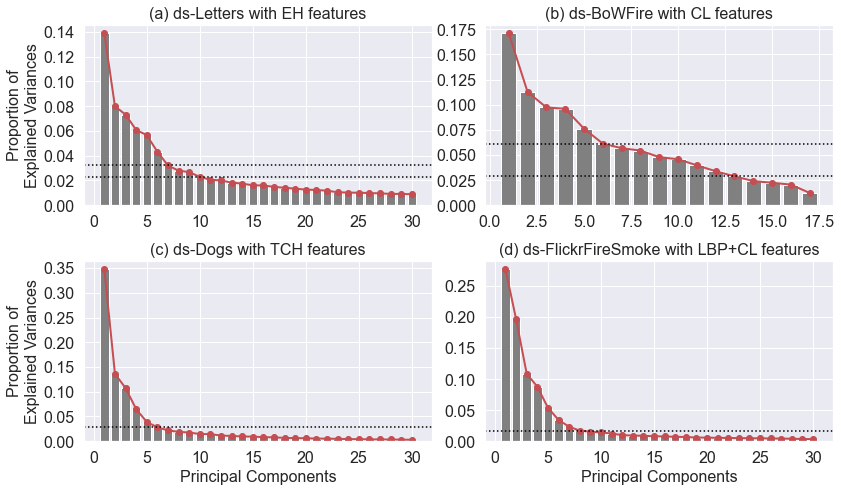

In [4]:
fig = plt.figure(figsize=[12, 7])

# ==============================================================================

plt.subplot(2, 2, 1)

datasets = ['ds-Letters']

# Read features and labels
dfData = pd.read_csv(path + datasets[0] + '_' + str(femNames[3]) + '.csv', sep = ',')
labels = pd.read_csv(path + datasets[0] + '.csv', sep = ',')
labels = labels['class']

pca, dfComponents, for_visual = runAnalysis(dfData)

PC_values = np.arange(pca.n_components_) + 1

plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.bar(PC_values, pca.explained_variance_ratio_, color='gray')

# Elbows
plt.axhline(y=pca.explained_variance_ratio_[6], color='black', linestyle=':')
plt.axhline(y=pca.explained_variance_ratio_[9], color='black', linestyle=':')

plt.title('(a) ds-Letters with EH features', size=16)
plt.ylabel('Proportion of\nExplained Variances', size=16)
plt.xticks(size=16)
plt.yticks(size=16)

# ==============================================================================

plt.subplot(2, 2, 2)

datasets = ['ds-BoWFire']

# Read features and labels
dfData = pd.read_csv(path + datasets[0] + '_' + str(femNames[0]) + '.csv', sep = ',')
labels = pd.read_csv(path + datasets[0] + '.csv', sep = ',')
labels = labels['class']

pca, dfComponents, for_visual = runAnalysis(dfData)

PC_values = np.arange(pca.n_components_) + 1

plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.bar(PC_values, pca.explained_variance_ratio_, color='gray')
plt.axhline(y=pca.explained_variance_ratio_[5], color='black', linestyle=':')
plt.axhline(y=pca.explained_variance_ratio_[12], color='black', linestyle=':')

plt.title('(b) ds-BoWFire with CL features', size=16)
plt.xticks(size=16)
plt.yticks(size=16)

# ==============================================================================

plt.subplot(2, 2, 3)

datasets = ['ds-Dogs']

# Read features and labels
dfData = pd.read_csv(path + datasets[0] + '_' + str(femNames[9]) + '.csv', sep = ',')
labels = pd.read_csv(path + datasets[0] + '.csv', sep = ',')
labels = labels['class']

pca, dfComponents, for_visual = runAnalysis(dfData)

PC_values = np.arange(pca.n_components_) + 1

plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.bar(PC_values, pca.explained_variance_ratio_, color='gray')

plt.axhline(y=pca.explained_variance_ratio_[5], color='black', linestyle=':')

plt.title('(c) ds-Dogs with TCH features', size=16)
plt.xlabel('Principal Components', size=16)
plt.ylabel('Proportion of\nExplained Variances', size=16)
plt.xticks(size=16)
plt.yticks(size=16)

# ==============================================================================

plt.subplot(2, 2, 4)

datasets = ['ds-FlickrFireSmoke']

# Read features and labels
dfData = pd.read_csv(path + datasets[0] + '_' + str(femNames[7]) + '.csv', sep = ',')
# Read more features and concatenate two FVs
dfData = pd.concat([dfData, pd.read_csv(path + datasets[0] + '_' + str(femNames[0]) + '.csv', sep = ',')], axis=1)

labels = pd.read_csv(path + datasets[0] + '.csv', sep = ',')
labels = labels['class_0']

pca, dfComponents, for_visual = runAnalysis(dfData)
PC_values = np.arange(pca.n_components_) + 1

plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.bar(PC_values, pca.explained_variance_ratio_, color='gray')

# Elbows
plt.axhline(y=pca.explained_variance_ratio_[7], color='black', linestyle=':')

plt.title('(d) ds-FlickrFireSmoke with LBP+CL features', size=16)
plt.xlabel('Principal Components', size=16)
plt.xticks(size=16)
plt.yticks(size=16)

# ==============================================================================
plt.tight_layout()
plt.savefig('PCA-analysis.png', dpi=500)